In [1]:
# execute this cell before you start

import tensorflow as tf
import tensorflow.keras as keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.keras.__version__)


2.6.0
2.6.0


#  CA1

to submit the assignment, please do the following:

- make sure that the notebook runs through and produces all desired output after `Kernel -> Restart & Run all`
- running through the whole notebook must not take no more than 60 minutes on a standard computer, similar to our lab-computers, without GPU and 8GB of RAM
- similarly, no cell must take longer than 10 minutes 
- do `Cell -> All output -> Clear` to clear all your output
- save the notebook (CA1.ipynb)
- upload the file `CA1.ipynb` to canvas.
- note that Google Colab ipynb files do not work with the nbgrader system I use to grade assignments and are therefore not allowed. 
- Please use markdown cells extensively, as you receive marks for explaining your observations.  Show your understanding!
- If you only use code cells, you do not receive marks.
- It is fine (but not required) to look for code on the Internet, in particular as a starting point.  However, this must be explicitly documented! You need to precisely say, which sources you used.  You do not need to cite code taken from the lecture notes, however, you need to cite, if you use code which is linked or cited in the lecture notes.


# Q1 The MNIST data

It seems that no course on Machine Learning is complete, without training a network on the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits.  You can access them through `keras.datasets.mnist.load_data()`.

The tasks for the first assignment is therefore:

a) (2 marks) Reproduce the results of L03, but now use the original MNIST dataset.  Comment on your observations on the differences between the datasets.

b) (5 marks) How can you improve the performance of the network? Here some suggestions of what you can try
   - Change the number of nodes in the hidden layer
   - Use a different loss function
   - Use a different optimizer
   - change the number of epochs
   - change the batch size
   - play with a dropout layer
   - work with two hidden layers
   - work with three hidden layers
   
Explain the effect of changing parameters in your own words and draw conclusions about how performance improves.  The mark for this part will depend on the overall insight demonstrated.  Code alone does not yield marks. 
Note that one aspect of performance is required training time.  Do not use code cells which take longer than 10 minutes to run on standard CPU based hardware. (Also don't use code which exceeds standard memory requirements of about 8GB RAM, but that should not be an issure here)



c) (3 marks) Write your student number on paper and take a photo. How well are the individual digits recognized? (Hint: you need to convert the photo first into the desired format, and there are many ways to do this.  You are expected 
to read up on a suitable way yourself, and describe how you did it.)



# Q1 - Part A

First, we load in the MNIST dataset of handwritten digits, assigning the data to two pairs of numpy arrays. One pair of arrays contains the training data (images) and the associated training labels, while the other pair of arrays contain the testing data (images) and their associated testing labels. 

In [6]:
(train_digits, train_labels), (test_digits, test_labels) = tf.keras.datasets.mnist.load_data()

### Exploring the data:

The training data comprises an array of arrays, with a shape of (60000, 28, 28), meaning it contains 60000 arrays (images), each of which are 28 x 28 pixels.

In [7]:
type(train_digits)

numpy.ndarray

In [8]:
train_digits.shape

(60000, 28, 28)

The full train_digits object:

In [9]:
train_digits  # an array of arrays

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Looking at the length of one full array, and just one of its individual rows, we can see that each image array is of 28 x 28 pixels:

In [10]:
len(train_digits[200]), len(train_digits[200][1])

(28, 28)

By examining the min and max values within an image, we can see that each pixel of the image is represented by a number ranging from 0-255, where 0 translates to the black colour and 255 translates to the white colour in the image. Numbers closer to 0 will represent darker areas of the image, while numbers closer to 255 will represent lighter areas of the image.

In [11]:
np.min(train_digits[2]), np.max(train_digits[2])

(0, 255)

If we take a look at one array/image as an example:

In [12]:
train_digits[2]  # the full 28x28 array for the third image in the train_digits data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

The above array corresponds to the image below of a handwritten digit 4

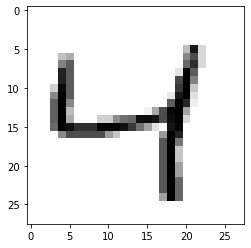

In [13]:
plt.imshow(train_digits[2],cmap="binary")

The label for this image can also be extracted from the train_labels array

In [14]:
train_labels[2] # labelled as a four 

4

There are 60000 labels, ranging from 0-9, with one label for each image in the training dataset. 

In [15]:
train_labels, len(train_labels)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8), 60000)

In [16]:
min(train_labels), max(train_labels)

(0, 9)

By creating a list of each digit written as text, each label from 0-9 now distinctly represents a number from 'Zero' to 'Nine')

In [17]:
class_names = ['Zero','One', 'Two', 'Three', 'Four', 'Five', 
               'Six', 'Seven', 'Eight', 'Nine']

In [18]:
class_names[0], class_names[9]

('Zero', 'Nine')

The test_digits data is also structrued the exact same as the train_digits data, this time containig 10000 arrays of arrays, each representing an image which is 28x28 pixels, with each pixel represented as a number from 0-255.

In [19]:
test_digits.shape 

(10000, 28, 28)

In [20]:
np.min(test_digits[2]), np.max(test_digits[2])

(0, 255)

Before building the learning model, we can plot some of the training and testing data to ensure digits are labelled correctly in each dataset.

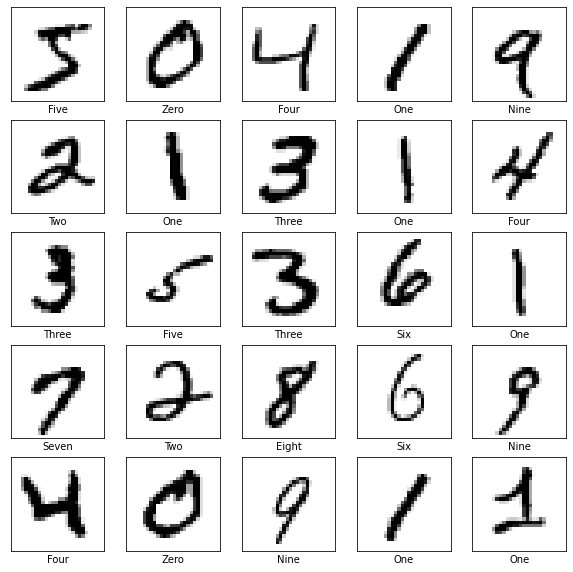

In [21]:
# TRAINING DATA 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_digits[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

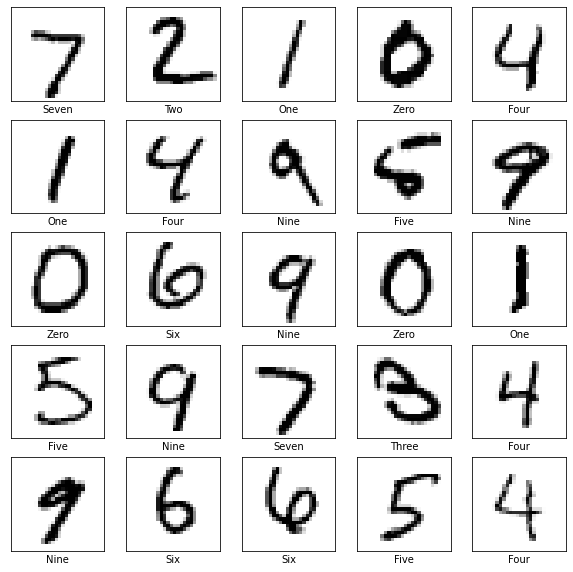

In [22]:
# TESTING DATA

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_digits[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])

### Data preprocessing - normalization

Before inputting data to the learning model, it must be normalized to values between 0 and 1, and so both the training and testing data is divided by a value of 255.

In [23]:
train_digits = train_digits / 255.0

test_digits =  test_digits / 255.0

In [24]:
np.min(train_digits[2]), np.max(train_digits[2])

(0.0, 1.0)

### Building the model

The model consists of an organized structure of layers that form the overall network.

Here, the layers are being stacked sequentially, using the tf.keras.Sequential() function, which takes the list of layers as input and bundles them together as a simple network, one layer after another. But one could also start with an empty model and add layers afterwards if they wished.

The layers in the model below are as follows:

#### Layer 1 - Input layer
The first layer of the model is a flattened layer with dimensions of 28x28. This layer expects the input entering the model to be of the shape 28x28, which are the dimensions of the image arrays in the training data. The Flatten() function makes the 28x28 shape into a longer one dimensional vector with 784 elements (28*28 = 784).

#### Layer 2 - Dense hidden layer
The second layer of the model is a dense layer, which in this case comprises 128 nodes/neurons. The dense layer is connected to the output of the input layer, so that each pixel of the flattened image input (28x28 = 784 pixel elements) is now connected to each of the 128 nodes/neurons of the dense layer. Each of these connections (784x128 = 100352 connections) has an associated weight value, and each node has an associated bias (128 biases). Matrix-vector multiplication is performed by this layer, enabling the connection between every input of the layer to every output of the layer. The activation function transforms the input values of the layer nodes and introduces the non-linearity into the model which is necessary for the model to be trained and to learn the relationships between the data. The activation function selected here is 'relu'. This function is the 'rectified linear unit activation function' and works by taking the output of the dense layer and either returning a 0 if the output is below 0, or returns the output itself if it is above 0 (positive).  

#### Layer 3 - Dense output layer
The final layer of the matrix is another dense layer, with 10 nodes representing the 10 possible outputs (digits 0-9). When the model has been successfully trained, this layer will assess whether the input of a '4' image is given by the correct output number label (0-9), i.e. does the image input match the number output. The activation function chosen here is 'softmax', which enables the output from this layer to be interpeted as a probability distribution. Each output will be assigned a probability distribution, with the highest probability value corresponding to the class (output) which the model beleives it is seeing from the input. For example, when the model is shown a 5, the highest probability value should be in position 5 of the ouput nodes if it has made the correct prediction. All 10 outputs of the softmax layer will sum to 1.


References:

Lecture-03

https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax

In [25]:
digit_model = tf.keras.Sequential([                     # Stack the layers sequentially      
    tf.keras.layers.Flatten(input_shape=(28, 28)),      # Input layer, flattened input shape of (28*28 = 784 elements)
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  # Dense layer, 128 nodes, relu activation function
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Dense layer, 10 output nodes, softmax activation function
])

In [26]:
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The above summary provides further details about the model.

The flattened layer has the shape (None, 784), with None meaning one can show a batch of images and it will give out a batch of results, and 784 representing the flattened 28*28 elements of the input image array.

The dense layer has 100480 trainable parameters, which comes from 784 inputs x 128 internal nodes + 128 biases.

The final dense layer has 1290 trainable parameters, which comes from 128 previous nodes * 10 inputs + 10 biases.

Now we must compile the model using model.compile():

In [27]:
digit_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

When compiling the model, it is translated to tensorflow graph, so now the data can be used to train the model.

The optimizer variable specifies what optimizer algorithm to use for the model. This optimizer will learn to modify the weights of the model in order to minimize the loss function. Here the optimzer algorithm is chosen to be the an adaptive optimizer known as 'adam', which improves on gradient descent and is ideal for sparse data. The training images are an example of sparse data as they contain many zero values. The adam optimizer makes use of random numbers, meaning it can quickly and efficiently minimize the loss funuction.

The loss function we are aiming to minimise with this model is 'sparse_categorical_crossentropy', which is ideal for multi-class classification. As mentioned, the data being used here to train the model is sparse categorical data. Sparse_categorical_crossentropy does not require the categorical labels to be one hot encoded prior to making comparisons with the softmax layer output and assessing the loss. 

The metrics variable allows you to keep track of important details related to the training diagnostics, such as the model 'accuracy' option that was selected here. The accuracy will assess how likely the model is to get the correct the result. 

References:

Lecture-03

https://gombru.github.io/2018/05/23/cross_entropy_loss/

https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e

https://stats.stackexchange.com/questions/267322/difference-between-missing-data-and-sparse-data-in-machine-learning-algorithms

### Training the model

Below we train the model with the model.fit() function, specifying the training images and their associated correct labels, and 5 epochs.

In [28]:
digit_model.fit(train_digits, train_labels, epochs=5)

2022-02-14 12:17:12.486052: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2565 - accuracy: 0.9259
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1163 - accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0805 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0616 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0468 - accuracy: 0.9857


Each input from the training dataset is fed into the model and it will calculate the loss function for each combination of images and training labels.

Each input actually consists of a batch of images (default = 32), as showing 60,000 images one by one could be quite a slow process. So with a batch of images as input, the model is predicting 32x10 outputs all in one go. As mentioned, each output will be 10 dimensional vector that has a probability distribution.

The model will look at the output for the predicted label, take the log value and sum all of these 32 values together.

The model must then update the weights within the network in order to minimize this sum of values.

In this way the model isnt just being shown 1 image and trying to change weights, it does it for a batch of 32. This is more computationally efficient.

Epochs allow the model to train on the entire image dataset numerous times, with each epoch offering the model another attempt at trying to change the weights and improve the minimization of the loss function.

Here there were 5 epochs specified, and a default batch size of 32, so there are 1875 (60000/32) steps the model must go through in order to see all images in the dataset.

With each epoch, the loss function output is reduced, and the accuracy  of the model increases.

### Testing the model

Despite the training accuracy being at 0.9875, the real test for accuracy is seen when testing the model with unseen data.

As we can see below, this accuracy is smaller than training accuracy, which makes sense as we are testing the model with new data it has never seen before.

In [29]:
orig_test_loss, orig_test_acc = digit_model.evaluate(test_digits, test_labels)

print('Test accuracy:', orig_test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9736
Test accuracy: 0.9735999703407288


The test accuracy here is approximately 97%, which is an excellent level of accuracy.

Checking the actual predictions made for each image:

In [30]:
predictions = digit_model.predict(test_digits)

In [31]:
predictions[0], sum(predictions[0])

(array([3.6179986e-07, 1.2191243e-08, 1.3219236e-05, 1.8762379e-03,
        1.1742364e-10, 4.6299846e-07, 8.9631313e-13, 9.9808264e-01,
        8.0198679e-06, 1.9095611e-05], dtype=float32),
 1.0000000475282387)

The largest probability value for the first predicted image is at position 7, which corresponds to 'seven' from class_names. 

Plotting the image and the correct class label, we can see that the model has successfully predicted the correct digit for this image.

In [32]:
np.argmax(predictions[0]), class_names[np.argmax(predictions[0])]

(7, 'Seven')

(<matplotlib.image.AxesImage at 0x7f29170f57f0>, 'Seven')

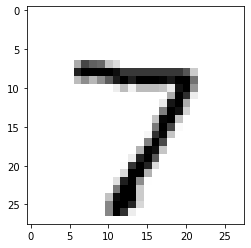

In [33]:
plt.imshow(test_digits[0],cmap="binary"), class_names[test_labels[0]]

For a full assessment of the model predictions, we can plot the predictions and compare them to their correct values. 

In [34]:
# functions from https://www.tensorflow.org/tutorials/keras/classification 

def plot_image(i, predictions_array, true_label, img): # true label of image, and prediction array from prev, i is index of image you are examining 
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False) 
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary) # used to show image from array 

    predicted_label = np.argmax(predictions_array) # check correct prediction or not
    if predicted_label == true_label:
        color = 'blue' # if correct - print blue
    else:
        color = 'red'  # if wrong - print red

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

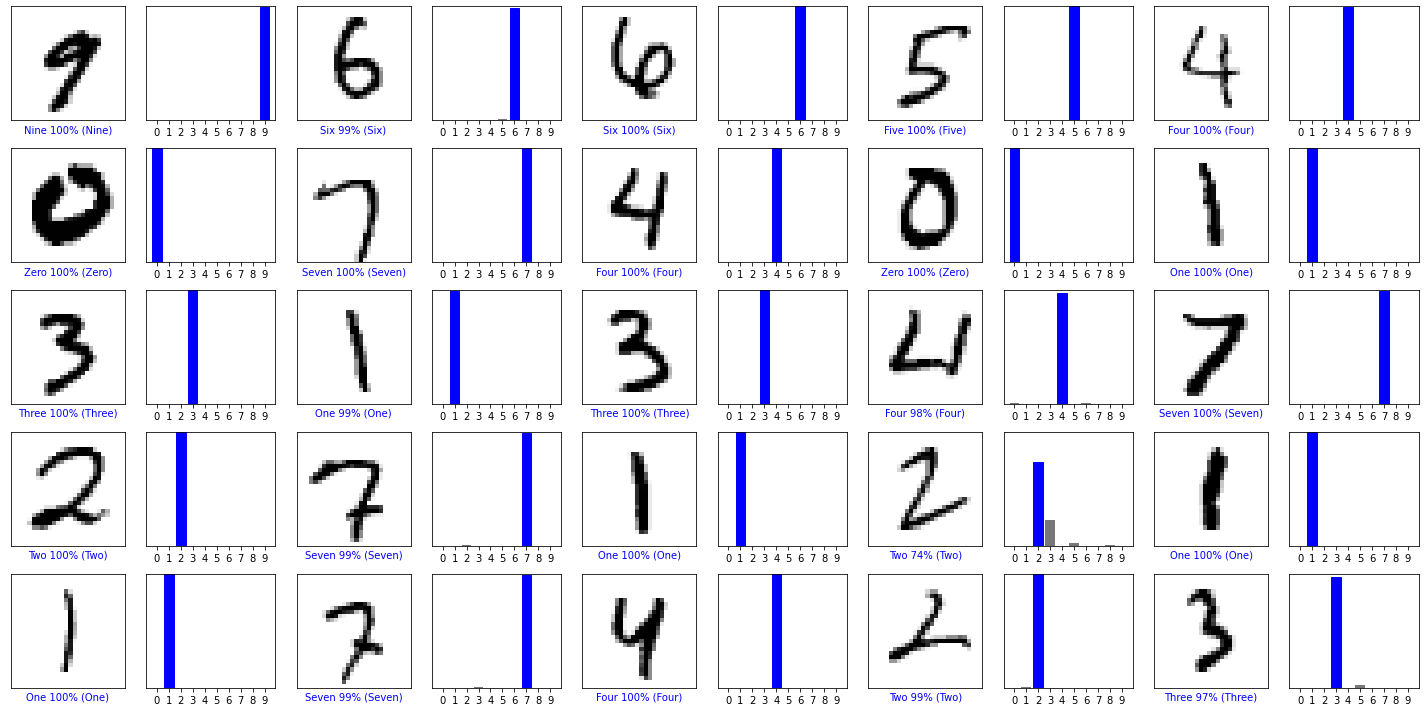

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Colour correct predictions in blue and incorrect predictions in red.

offset=20
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+offset, predictions[i+offset], test_labels, test_digits)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+offset, predictions[i+offset], test_labels)
plt.tight_layout()
plt.show()

### Comments

Here the model had an accuracy of 97% and predicted the handwritten digits with very few errors, evident in the plot of the first 25 predictions above. 

With the fasion dataset, the same model had an accuracy of apprximately 87%, and struggled to make accurate predictions for certain clothing items.

The difference in performance may be due to the simple nature of handwritten digits, which are each easily distinguishable for the model. The handwritten digits have definitive shapes and easily identifiable features for the model to learn from in training. 

With the fasion items, there were many similar looking items that may be tricky even for a human to identify with full confidence, especially with similarly shaped items such as different shoes, coats, pulovers, etc. 

If the image lacks real definitive features, the model will have a hard time predicting the image. 

It is possible that a more complex layered network may improve the accuracy in the fashion classification model, and the simple 3 layered model just suits the handwritten digit dataset better overall.


# Q1 - PART B

The model is currently performing at 97% accuracy, and so it will be challenging to improve this further. However, we can change certain paramaters in the model structure, compilation and fitting, and then examine how this affects the overall performance of the model. 

Here I have tested changes to the number of nodes in the hidden layer, the number of epochs, the batch size and also test a dropout layer. I have experimented with these parameters specificallyy because I believe the optimizer and loss function used for compiling the model are the most suitable for the data we are training and testing the model with.

As explained in Q1 Part A, the optimizer will learn to modify the weights of the model in order to minimize the loss function. Here the optimzer algorithm will be 'adam' and will remain unchanged. 'Adam' is known to be a reliable optimizer, improving on gradient descent and ideal for sparse data such as the training images that we are using here. The adam optimizer makes use of random numbers, meaning it can quickly and efficiently minimize the loss funuction.

The loss function we are aiming to minimise (with the help of 'adam') is 'sparse_categorical_crossentropy', which is ideal for multi-class classification. As mentioned, the data being used here to train the model is sparse categorical data. Sparse_categorical_crossentropy does not require the categorical labels to be one hot encoded prior to making comparisons with the softmax layer output and assessing the loss. 

Overall, the 'adam' optimizer and 'sparse_categorical_crossentropy' loss function are most suitable and resulted in a ~97% accuracy level when testing the original model. Therefore I will leave these parameters as they are in the hope that experimenting with other parameters may help enhance this accuracy valeu beyond 0.97.

### CHANGING NUMBER OF NODES IN HIDDEN  LAYER

Firstly, let us change the number of nodes/neurons within the hidden layer of the model. This will increase/decrease the number of trainable paramaters in the model and affect the number of connections between inputs and outputs of the hidden layer, and thus the number of associated weights and biases.

We will start by halving the number of nodes in the model from 128 to 64, and seeing how this changes its performance accuracy.

In [515]:
# Changing the number of nodes in the hidden layer to 64 (half of original model)
# everything else remains the same

nodes_mod1 = tf.keras.Sequential([                           
    tf.keras.layers.Flatten(input_shape=(28, 28)),      
    tf.keras.layers.Dense(64, activation=tf.nn.relu),  # 64 nodes 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

nodes_mod1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_41 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


As before, the above summary provides further details about the model.

The flattened layer has the same shape (None, 784), with None meaning one can show a batch of images and it will give out a batch of results, and 784 representing the flattened 28*28 elements of the input image array.

The dense layer now has 50240 trainable parameters, which comes from 784 inputs x 64 internal nodes + 64 biases.

The final dense layer has just 650 trainable parameters, which comes from 64 previous nodes * 10 inputs + 10 biases.

Now to compile the model using model.compile(). The exact same optimizer and loss function is being used here.

In [516]:
nodes_mod1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

As mentioned previosuly, the optimizer algorithm is chosen to be the an adaptive optimizer 'adam', which improves on gradient descent and is ideal for this sparse image data. The adam optimizer makes use of random numbers, meaning it can quickly and efficiently minimize the loss function.

The loss function being minimized is 'sparse_categorical_crossentropy', which suits our multi-class digit image classification data the best. Sparse_categorical_crossentropy does not require the categorical labels to be one hot encoded prior to making comparisons with the softmax layer output.

As before, the accuracy will assess how likely the model is to get the correct the result. 

In [517]:
nodes_mod1.fit(train_digits, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2981 - accuracy: 0.9163
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1448 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1048 - accuracy: 0.9688
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0827 - accuracy: 0.9745
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0678 - accuracy: 0.9800


Each input from the training dataset is fed into the model and it will calculate the loss function for each combination of images and training labels.

The default batch size was used, with each input consisting of a batch of 32 images. The model is therefore predicting 32x10 outputs all in one go. As mentioned, each output will be 10 dimensional vector that has a probability distribution.

The model will look at the output for the predicted label, take the log value and sum all of these 32 values together. The model must then update the weights within the network in order to minimize this sum of values.

Here there were 5 epochs specified, and a default batch size of 32, so there are 1875 (60000/32) steps the model must go through in order to see all images in the dataset.

Upon completion of training, the model was able to minimize the loss function to a value of 0.0678, and an accuracy of 0.98 (Note - these values may slightly differ when rerunning the model).

To examine the true accuracy, the model was evaluated on the testing image data.

In [524]:
nodes_loss_64, nodes_acc_64 = nodes_mod1.evaluate(test_digits, test_labels)

print('Test accuracy:', nodes_acc_64)


313/313 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9728
Test accuracy: 0.9728000164031982


From the testing accuracy, it is evident that reducing the number of nodes in the hidden layer of the model to 64 did not improve upon the original model performance and actually resulted in a very similar performance (~97%). The accuracy value is still quite high, so reducing the nodes to 64 did not significantly hamper the performance of the model. 

This is an interesting observation, as it demonstrates that this multi-class image classification model does not need a greater number of nodes to sufficiently train the model to predict unseen images. A lower number of nodes will still allow for a sufficient number of trainable model parameters does not appear to negatively affect the model's understanding of the relationships between inputs and outputs of the hidden layer.

So what happens if we were to double the number of nodes?

Here the number of nodes in the hidden dense layer of the  model is being set to 256 nodes:

In [519]:
# Change the number of nodes in the hidden layer to 256 (double)

nodes_mod2 = tf.keras.Sequential([                           
    tf.keras.layers.Flatten(input_shape=(28, 28)),      
    tf.keras.layers.Dense(256, activation=tf.nn.relu),  
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

nodes_mod2.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_43 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


The flattened layer has the same shape (None, 784).

The dense layer now has 200,960 trainable parameters (784 inputs x 256 internal nodes + 256 biases).

The final dense layer has signifcantly more trainable parameters (2570) than the model just tested above (256 previous nodes * 10 inputs + 10 biases).

Again, the exact same optimizer and loss function is being used here. Nothing has been changed but the number of nodes.

In [520]:
nodes_mod2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [521]:
nodes_mod2.fit(train_digits, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2222 - accuracy: 0.9361
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0932 - accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0620 - accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0438 - accuracy: 0.9861
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0334 - accuracy: 0.9891


In [525]:
nodes_loss_256, nodes_acc_256 = nodes_mod2.evaluate(test_digits, test_labels)

print('Test accuracy:', nodes_acc_256)

# slightly better than original, better than half

313/313 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9769
Test accuracy: 0.9768999814987183


Upon completion of training, the model was able to minimize the loss function to a value of 0.0334, with an accuracy of 0.9891.

Upon completion of testing, the model was able to minimize the loss function to a value of 0.0737 with an accuracy of 0.9769.

From this testing accuracy, it is evident that signifcantly increasing the number of nodes in the hidden layer of the model to 256 also did not significantly improve upon the original model performance and again resulted in a similar performance (97% vs 97% accuracy). However, the accuracy with 256 nodes was marginally better than that of 64 nodes, but this difference is so small it won't make any real improvement in predictive power. 

Once again it is interesting to note that increasing the nodes in this case by double the original value did not decrease the performance. It appears that having too many nodes is not an issue for the model, with the model finding it just as easy to to accurately predict the digit images after being trained on 200,960 parameters. 

Another interesting observation is that the test loss value, although not significantly better, was the lowest when using a model with 256 nodes, so it is possible that the greater number of training parameters within this model improved the minimization of the loss function.

Overall, having 128 nodes is definitely a reliable number of nodes for this model and this data, being large enough to have a sufficient number of trainable parameters, while also not being too small so the model can be better trained to accurately predict the images it sees. At 128 nodes, the model appears to be understanding the relationship between inputs and outputs of the hidden layer very well. Neither increasing or decreasing this value will make too much of a difference to overall predictive accuracy, or computation time.

Results:

In [529]:
print('64 Nodes:',  'Test loss', nodes_loss_64, 'Test accuracy:', nodes_acc_64)
print('128 Nodes:', 'Test loss', orig_test_loss, 'Test accuracy:', orig_test_acc)
print('256 Nodes:', 'Test loss', nodes_loss_256, 'Test accuracy:', nodes_acc_256)

64 Nodes: Test loss 0.09159788489341736 Test accuracy: 0.9728000164031982
128 Nodes: Test loss 0.07764779031276703 Test accuracy: 0.975600004196167
256 Nodes: Test loss 0.07368256151676178 Test accuracy: 0.9768999814987183


### CHANGING THE NUMBER OF EPOCHS

Next I will change the number of epochs and see if this can improve the overall testing accuracy of the model.

Epochs allow the model to train on the entire image dataset numerous times, with each epoch offering the model another attempt at trying to change the weights and improve the minimization of the loss function.

As we are now training the model with more epochs, it is a good opportunity to set up a validation subset of the training images data that can also be used in training. This will allow us to assess how well the model is performing while it is being trained. 

Firstly, let us look at the orginal model again with 5 epochs:

In [550]:
#### 5 EPOCHS - ORIGINAL MODEL ####

epoch_mod5 = tf.keras.Sequential([                           
    tf.keras.layers.Flatten(input_shape=(28, 28)),      
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [551]:
epoch_mod5.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Below is where the validation set of training data is set up.

I have set the validation data to consist of the first 6000 images from the 60000 total images in the training dataset (one tenth of the dataset size). Therefore, the model will train on 54000 images at each epoch and will also test itself on the 6000 images of the validation data. This will give us an insight into how the model is performing in terms of minimizing the loss function and overall accuracy, similar to testing the model with unseen data.

In [552]:
train_N=6000
x_val = train_digits[:train_N] # first 6000 images make up the validation data
partial_x_train = train_digits[train_N:]

y_val = train_labels[:train_N]
partial_y_train = train_labels[train_N:]

In [553]:
epoch_5 = epoch_mod5.fit(partial_x_train, partial_y_train, epochs=5, 
                    batch_size=32, validation_data=(x_val, y_val), verbose=1)

Epoch 1/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2685 - accuracy: 0.9225 - val_loss: 0.1346 - val_accuracy: 0.9612
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1167 - accuracy: 0.9655 - val_loss: 0.1078 - val_accuracy: 0.9672
Epoch 3/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0804 - accuracy: 0.9765 - val_loss: 0.0857 - val_accuracy: 0.9735
Epoch 4/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0602 - accuracy: 0.9822 - val_loss: 0.0781 - val_accuracy: 0.9750
Epoch 5/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0467 - accuracy: 0.9855 - val_loss: 0.0854 - val_accuracy: 0.9750


In [554]:
epoch5_loss, epoch5_acc = epoch_mod5.evaluate(test_digits, test_labels)

print('Test accuracy:', epoch5_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0854 - accuracy: 0.9739
Test accuracy: 0.9739000201225281


As before, the original model with 5 epochs results in an excellent testing accuracy of 0.97. Interestingly, with the more detailed output including the validation loss and accuracy, we can see how the loss function continues to decrease for the validation data during the first 4 epochs, but then at the 5th epoch it starts to increase. Already it would seem that 5 epochs is probably a good number for this model to be trained with, as we do not want this loss value to start increasing further.

Let's now try 10 epochs and see how this affects the loss and accuracy of the model.

In [555]:
#### 10 EPOCHS ####

epoch_mod10 = tf.keras.Sequential([                           
    tf.keras.layers.Flatten(input_shape=(28, 28)),      
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [556]:
epoch_mod10.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Again, validation data will be used for training. 

In [557]:
train_N=6000
x_val = train_digits[:train_N]
partial_x_train = train_digits[train_N:]

y_val = train_labels[:train_N]
partial_y_train = train_labels[train_N:]

In [558]:
epoch_10 = epoch_mod10.fit(partial_x_train, partial_y_train, epochs=10, 
                    batch_size=32, validation_data=(x_val, y_val), verbose=1)

Epoch 1/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2714 - accuracy: 0.9222 - val_loss: 0.1479 - val_accuracy: 0.9595
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1222 - accuracy: 0.9640 - val_loss: 0.1028 - val_accuracy: 0.9690
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0829 - accuracy: 0.9760 - val_loss: 0.0965 - val_accuracy: 0.9708
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0613 - accuracy: 0.9809 - val_loss: 0.0834 - val_accuracy: 0.9735
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0894 - val_accuracy: 0.9703
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0382 - accuracy: 0.9881 - val_loss: 0.0852 - val_accuracy: 0.9738
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0806 - val_accuracy

In [559]:
epoch10_loss, epoch10_acc = epoch_mod10.evaluate(test_digits, test_labels)

print('Test accuracy:', epoch10_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9770
Test accuracy: 0.9769999980926514


With 10 epochs, the training and validation images are shown to the model 10 times, allowing the model to adjust and update weights in order to efficiently minimize the loss function.

Here the validation loss function is reduced to a value very similar to that of 5 epochs, with double the number of epochs (10) offering much the same level of accuracy (0.97 again). 

The model is therefore still training very effectively with 10 epochs. But 10 epochs means the model is also taking a longer time to compute, so I would still use 5 as 10 does not seem necessary.

What happens if we try a larger number of epochs again?

In [576]:
#### 20 EPOCHS ####

epoch_mod20 = tf.keras.Sequential([                           
    tf.keras.layers.Flatten(input_shape=(28, 28)),      
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [577]:
epoch_mod20.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [578]:
train_N=6000
x_val = train_digits[:train_N]
partial_x_train = train_digits[train_N:]

y_val = train_labels[:train_N]
partial_y_train = train_labels[train_N:]

In [579]:
epoch_20 = epoch_mod20.fit(partial_x_train, partial_y_train, epochs=20, 
                    batch_size=32, validation_data=(x_val, y_val), verbose=1)

Epoch 1/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2732 - accuracy: 0.9220 - val_loss: 0.1354 - val_accuracy: 0.9613
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1187 - accuracy: 0.9654 - val_loss: 0.0982 - val_accuracy: 0.9707
Epoch 3/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0812 - accuracy: 0.9757 - val_loss: 0.0852 - val_accuracy: 0.9743
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0619 - accuracy: 0.9815 - val_loss: 0.0780 - val_accuracy: 0.9752
Epoch 5/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0770 - val_accuracy: 0.9753
Epoch 6/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0361 - accuracy: 0.9891 - val_loss: 0.0796 - val_accuracy: 0.9755
Epoch 7/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0742 - val_accuracy

In [581]:
epoch20_loss, epoch20_acc = epoch_mod20.evaluate(test_digits, test_labels)

print('Test accuracy:', epoch20_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1072 - accuracy: 0.9782
Test accuracy: 0.9782000184059143


With 20 epochs, the training and validation images are shown to the model 20 times.

Upon completion, the training loss is reduced to 0.0067 and training accuracy is 0.9979. The  validation loss function is reduced to a value very similar to that of 5 and 10 epochs, but reaches its minimum at 7 epochs. After   7 epochs, the validation loss starts to increase slightly and continues this increasing trend until completion. The validation accuracy also appears to remain steady at approximately 0.97.

So overall, despite the incredibly high accuracy of the model in training, the testing accuracy was much the same as before (~0.98). 

20 epochs for this model may result in overtraining in this case, with the model now just remembering what it sees rather than understanding the relationships and actively learning with each epoch. However, as the testing acuracy is not reduced, this is not a major issue in this training model. 

However, as with 10 epochs, 20 epochs takes quite a long time to compute with the default batch size, and results in a very similar testing accuracy to that of 5 epochs in the end. 

Therefore, there is no need to increase the epochs on the original model, 5 epochs performs just as well as 10 and 20. If increased any further, the testing capcity of the model will be reduced and overfitting could be an issue with the current batch size.

But if we try a significantly larger batch size, how will the model be affected?

In [606]:
#### 30 EPOCHS BATCH SIZE 500 ####

batch_mod = tf.keras.Sequential([                           
    tf.keras.layers.Flatten(input_shape=(28, 28)),      
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [607]:
batch_mod.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [608]:
train_N=6000
x_val = train_digits[:train_N]
partial_x_train = train_digits[train_N:]

y_val = train_labels[:train_N]
partial_y_train = train_labels[train_N:]

In [609]:
batch_fit = batch_mod.fit(partial_x_train, partial_y_train, epochs=30, 
                    batch_size=500, validation_data=(x_val, y_val), verbose=1)

Epoch 1/30
108/108 [==============================] - 2s 8ms/step - loss: 0.6167 - accuracy: 0.8340 - val_loss: 0.2835 - val_accuracy: 0.9208
Epoch 2/30
108/108 [==============================] - 1s 6ms/step - loss: 0.2641 - accuracy: 0.9264 - val_loss: 0.2214 - val_accuracy: 0.9388
Epoch 3/30
108/108 [==============================] - 1s 7ms/step - loss: 0.2068 - accuracy: 0.9422 - val_loss: 0.1795 - val_accuracy: 0.9498
Epoch 4/30
108/108 [==============================] - 1s 6ms/step - loss: 0.1688 - accuracy: 0.9517 - val_loss: 0.1529 - val_accuracy: 0.9567
Epoch 5/30
108/108 [==============================] - 1s 7ms/step - loss: 0.1422 - accuracy: 0.9596 - val_loss: 0.1327 - val_accuracy: 0.9628
Epoch 6/30
108/108 [==============================] - 1s 8ms/step - loss: 0.1224 - accuracy: 0.9660 - val_loss: 0.1216 - val_accuracy: 0.9647
Epoch 7/30
108/108 [==============================] - 1s 6ms/step - loss: 0.1069 - accuracy: 0.9700 - val_loss: 0.1104 - val_accuracy: 0.9677
Epoch 

In [610]:
batch_loss, batch_acc = batch_mod.evaluate(test_digits, test_labels)

print('Test accuracy:', batch_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0720 - accuracy: 0.9782
Test accuracy: 0.9782000184059143


The larger batch size allows the model to be trained faster over a higher number of epochs.

At each epoch, the model is predicting 512x10 outputs all in one go, with each output being a 10 dimensional vector that has a probability distribution.

Here there were 30 epochs specified, and with a batch size of 512, there are 106 steps the model must go through in order to see all images in the dataset.

Upon completion, the loss function output is reduced to 0.0133, and the accuracy reaches 0.9983. 

Interestingly, at the 25th epoch, the validation loss decreases to the lowest value so far of all the models (0.0691) and does not increase past a value 0.08, which is very good. 

Overall the testing accuracy remains at a value of ~0.98, a similar value to previous models.

### ADDING A DROPOUT LAYER 

Another aspect of the model that be altered is the layered structure of the network.

A dropout layer can be introduced, and may help increase the testing accuracy of the model.

A dropout layer prevents a certain fraction of the inputs from getting to the next layer, at random. 

This forces the network to not rely on the previous layer, and thus may help suppress overfitting as the model is now more likely to look for generic features rather than just remembering specific features.

In [612]:
#### DROPOUT LAYER - 0.5 (50%) selected as the fraction of inputs to be prevented from reaching next layer ####

drop_mod = tf.keras.Sequential([                           
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [613]:
drop_mod.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [615]:
train_N=6000
x_val = train_digits[:train_N] # first 6000 images make up the validation data
partial_x_train = train_digits[train_N:]

y_val = train_labels[:train_N]
partial_y_train = train_labels[train_N:]

In [616]:
drop_hist = drop_mod.fit(partial_x_train, partial_y_train, epochs=5, 
                    batch_size=32, validation_data=(x_val, y_val), verbose=1)

Epoch 1/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4352 - accuracy: 0.8667 - val_loss: 0.1955 - val_accuracy: 0.9422
Epoch 2/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2464 - accuracy: 0.9251 - val_loss: 0.1216 - val_accuracy: 0.9648
Epoch 3/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1941 - accuracy: 0.9388 - val_loss: 0.1153 - val_accuracy: 0.9678
Epoch 4/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1652 - accuracy: 0.9482 - val_loss: 0.0934 - val_accuracy: 0.9730
Epoch 5/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1516 - accuracy: 0.9521 - val_loss: 0.0857 - val_accuracy: 0.9732


In [617]:
drop_loss, drop_acc = drop_mod.evaluate(test_digits, test_labels)

print('Test accuracy:', drop_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9709
Test accuracy: 0.9708999991416931


In [623]:
#### DROPOUT LAYER - 0.2 (20%) selected as the fraction of inputs to be prevented from reaching next layer ####
#### 8 EPOCHS 

drop_mod2 = tf.keras.Sequential([                           
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [624]:
drop_mod2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [625]:
train_N=6000
x_val = train_digits[:train_N] # first 6000 images make up the validation data
partial_x_train = train_digits[train_N:]

y_val = train_labels[:train_N]
partial_y_train = train_labels[train_N:]

In [626]:
drop_hist2 = drop_mod2.fit(partial_x_train, partial_y_train, epochs=8, 
                    batch_size=32, validation_data=(x_val, y_val), verbose=1)

Epoch 1/8
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3111 - accuracy: 0.9078 - val_loss: 0.1490 - val_accuracy: 0.9567
Epoch 2/8
1688/1688 [==============================] - 13s 8ms/step - loss: 0.1512 - accuracy: 0.9544 - val_loss: 0.1080 - val_accuracy: 0.9688
Epoch 3/8
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1106 - accuracy: 0.9664 - val_loss: 0.0942 - val_accuracy: 0.9725
Epoch 4/8
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0917 - accuracy: 0.9706 - val_loss: 0.0789 - val_accuracy: 0.9767
Epoch 5/8
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0773 - accuracy: 0.9750 - val_loss: 0.0787 - val_accuracy: 0.9758
Epoch 6/8
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0667 - accuracy: 0.9791 - val_loss: 0.0693 - val_accuracy: 0.9785
Epoch 7/8
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0608 - accuracy: 0.9797 - val_loss: 0.0697 - val_accuracy:

In [627]:
drop_loss2, drop_acc2 = drop_mod2.evaluate(test_digits, test_labels)

print('Test accuracy:', drop_acc2)

313/313 [==============================] - 1s 3ms/step - loss: 0.0729 - accuracy: 0.9795
Test accuracy: 0.9794999957084656


A dropout of 0.5 with 5 epochs and 0.2 with 8 epochs both return similar testing accuracy results of approximately 0.98, resultinng in no significant improvement or decline in model performance.

Both models displayed a consistent decrease in the validation loss function output and a steady validation accuracy of 0.97 after epoch 4.

It is good to see the model still performing well when the dropout layer is being used, even when 50% of inputs are being left out. It is a useful layer to add, hopefully suppressing possible overfitting with the model, allowing it to perform well with unseen data.

In conclusion, the model appears to consistently result in a testing accuracy ranging from 0.97 to 0.98, with various paramater changes failing to improve on this already very high level of accuracy. 

Nonetheless, it was interesting to explore the various options at one's disposal when building and assessing a neural network model.

# Q1 - PART C

For this section. my student number was written using a pen on a piece of paper and the image uploaded as a '.jpg' file to the same directory as this CA1 notebook.

## Preprocessing

First I loaded in the image using matplotlib and the plt.imread() function:

In [144]:
img = plt.imread('student_num.jpg')

When looking at the image array, we can see it has a 3 dimensional shape, and is not in the correct format for testing with our trained model from Q1 Part A/B. The image here is 546 x 2055 pixels and also third dimension, representing the RGB colour model of the image. However, the  model that will be used for testing was trained on black and white images, of 28x28 pixels, each with an associated value ranging from 0-255. Here the pixel values range from 0-248.

In [148]:
img.shape, np.min(img), np.max(img)

((546, 2055, 3), 0, 248)

In [ ]:
img

To convert the image to the suitable format, I will be using the OpenCV python library, which will help with genrating a black and white image and downscaling the image to correct pixel dimensions.

In [151]:
import cv2 as cv

cv_img = cv.imread('student_num.jpg',cv.IMREAD_GRAYSCALE) # reading the image in as grayscale

Reading the image in as a grayscale format allows the third dimension of the image array (RGB colour) to be removed, leaving just the pixel dimensions 546 x 2055. 

In [152]:
cv_img.shape, np.max(cv_img)

((546, 2055), 242)

However, the pixel values still range from 0-242, so this must be converted to 0-255 binary format. This can be done using the cv.threshold() function, which performs image thresholding for the grayscale student nunber image. This means that if a pixel value is below a certain threshold, it will be assigned to 0, and if it is above the threshold it is set to the max value, in this case - 255. Here I do not know the correct threshold to use so the cv.THRESH_OTSU paramter is specified, which will automatically select the best threshold. The threshold type was set to cv.THRESH_BINARY_INV in order to get the image into the same binary format as the images that our model was trained on.

In [181]:
# CODE ADAPTED FROM:
# https://stackoverflow.com/questions/7624765/converting-an-opencv-image-to-black-and-white 
# https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

(thresh, img_bw) = cv.threshold(cv_img, 128, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

In [182]:
img_bw.shape, np.max(img_bw)

((546, 2055), 255)

To plot the image:

Normal with no cmap specified.

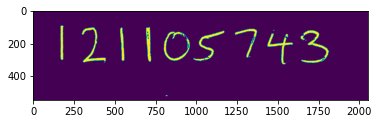

In [183]:
plt.imshow(img_bw)

With cmap = 'binary', the image now looks like our training images.

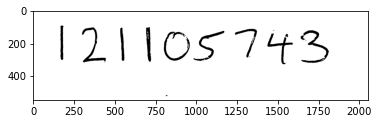

In [184]:
plt.imshow(img_bw, cmap = 'binary')

The values must still be normalized as before and set as type float:

In [185]:
img_bw = img_bw / 255.0

img_bw = img_bw.astype('float')

1.0

In [186]:
np.min(img_bw),np.max(img_bw)

(0.0, 1.0)

To feed the model with similar images as the training and testing set, the student number image must be split up into each individual number, and must be scaled down to a 28 x 28 pixel image.

Firstly, I manually sliced up the image arrays (by eye). In total, there were 9 images, each representing a handwritten digit of my student number.

In [162]:
id_num1 = img_bw[0:350,100:250]
id_num2 = img_bw[0:350,250:480]
id_num3 = img_bw[0:350,480:620]
id_num4 = img_bw[0:350,620:800]
id_num5 = img_bw[0:350,780:970]
id_num6 = img_bw[0:350,970:1200]
id_num7 = img_bw[0:350,1200:1400]
id_num8 = img_bw[0:350,1400:1600]
id_num9 = img_bw[0:350,1600:1850]

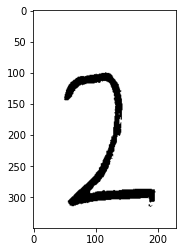

In [189]:
plt.imshow(id_num2, cmap = 'binary')

I then placed all 9 images into a list so they are now stored in one place.

In [164]:
id_num_list = [id_num1,id_num2,id_num3,id_num4,id_num5,id_num6,id_num7,id_num8,id_num9]

To scale the images down to 28 x 28 pixels, I used the cv.resize() function, specifying the desired shape of (28, 28). Each downscaled image was added to a new list, which now contained all the new images in 28x28 pixel dimension.

In [165]:
to_scale_list = []
for array in id_num_list:
    to_scale_list.append(cv.resize(array, (28,28)))

In [191]:
to_scale_list[2].shape

(28, 28)

The model we trained previously took an array of arrays as input, so here we must do the same. 

Firsty, I set up a numpy array of zeros with the shape (9,28,28), specifying 9 spots for the 9 images, each of which is made up of a 28x28 pixel array.

This array of arrays was called 'handwritten' and contained all the handwritten digits of my student number in the correct format.

In [166]:
handwritten = np.zeros((9, 28, 28))

for i in range(len(handwritten)):
    handwritten[i] = to_scale_list[i]

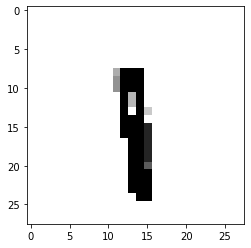

In [192]:
plt.imshow(handwritten[3], cmap = 'binary')

I then set up the array of correct labels for each digit in my student number.

The class names are still the same from before.

In [194]:
id_labels = np.array([1,2,1,1,0,5,7,4,3])

In [200]:
class_names

['Zero',
 'One',
 'Two',
 'Three',
 'Four',
 'Five',
 'Six',
 'Seven',
 'Eight',
 'Nine']

## Testing the model

Testing the orignal model from Q1 Part A on my handwritten digits:

In [195]:
predictions = digit_model.predict(handwritten)

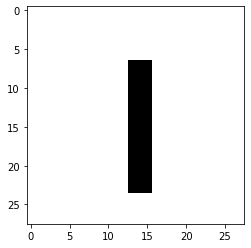

In [202]:
plt.imshow(handwritten[0],cmap="binary")

In [203]:
np.argmax(predictions[0]) # predicted correctly

1

I assessed all 9 image predictions using the same plotting functions as before:

In [204]:
# functions from https://www.tensorflow.org/tutorials/keras/classification 

def plot_image(i, predictions_array, true_label, img): # true label of image, and prediction array from prev, i is index of image you are examining 
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False) 
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap='binary') # used to show image from array 

    predicted_label = np.argmax(predictions_array) # check correct prediction or not
    if predicted_label == true_label:
        color = 'blue' # if correct - print blue
    else:
        color = 'red'  # if wrong - red

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

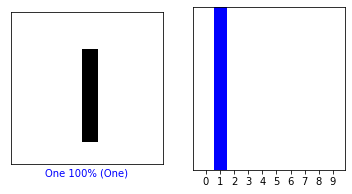

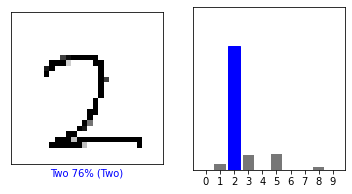

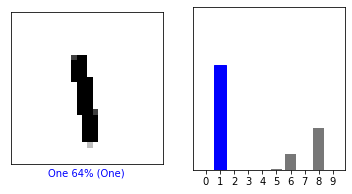

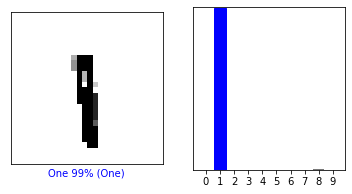

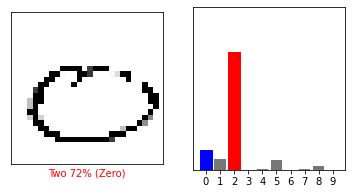

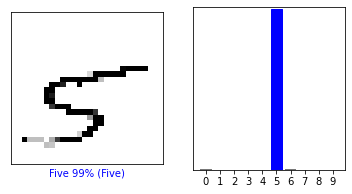

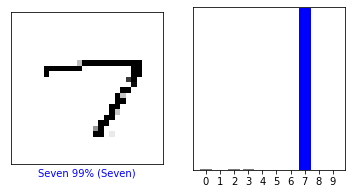

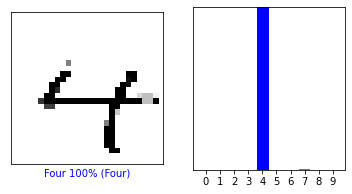

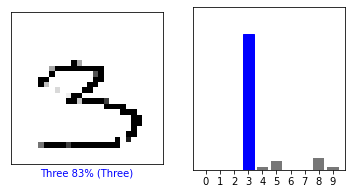

In [205]:
id_nums = 9

for i in range(id_nums):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, handwritten)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()


Overall, the model predicted 8 out of the 9 digits correctly, so it performed very well here on this unseen data. The worst prediction probability of the correct guesses was for the third id number, '1'. 

Interstingly, on previous attempts, when specifying cv.THRESH_BINARY within the cv.threshold() function, the model performed poorly. But when specifying cv.THRESH_BINARY_INV, the model vastly improved, highlighting the importance of having the correct input format for the model to be tested on. If the model is fed poorly formatted images or incorrect dimensions, it will not perform well or in some cases will not even function at all. 

The only digit it failed to predict was '0', which is likely due to my own handwriting (human) error. When downscaled to 28x28, the zero does not appear very definitive, and it also has a little curl at the top of its shape. As a result, the model predicted this digit as being a '2', and I believe this may because the '2' and my '0' here start with the same type of curve before looping around. It did predict a zero with some probability, but signifcantly preicted a '2'.

In conlcusion, I am satisfied with how the model performed, especially considering the image arrays were manipualted and downscaled to suit the testig format.

# Q2 The Reuters newswire data

(10 points)

Consider the data in  `tensorflow.keras.datasets.reuters` and train a network which reliably categorizes the newswires.  

Hints: 
- some general explanations of all the datasets included in Keras is here: https://keras.io/datasets/
After `from tensorflow.keras.datasets import reuters` you can get the dataset and the word index with through `reuters.get_word_index()` and `reuters.load_data()`.  The training labels correspond to different topics for each newswire.  The list of topics can be found here: https://github.com/keras-team/keras/issues/12072. 
- Always look at your data, before you feed it into a network!
- Coherence of presentation is key.  Provide explanations of what you are doing and why you are doing it. 
- Note that it is expected and allowed to obtain inspiration for solving this task from the Internet. However, all sources need to be clearly cited!  
- Provide coherent explanations on what improves performance or not. 
- Code without explanation will not yield points. 



## Viewing the data

In [3]:
from tensorflow.keras.datasets import reuters

(train_reuters, reut_train_lab), (test_reuters, reut_test_lab) = reuters.load_data()

In [4]:
type(train_reuters), train_reuters.shape

(numpy.ndarray, (8982,))

In [5]:
len(train_reuters[20]), len(train_reuters[21]), len(train_reuters[22]), len(train_reuters[23])

(231, 108, 83, 29)

In [6]:
train_reuters[50]

[1,
 1479,
 1197,
 71,
 8,
 25,
 1479,
 1197,
 640,
 71,
 304,
 471,
 80,
 9,
 1379,
 1901,
 4530,
 6797,
 79,
 5,
 8144,
 71,
 175,
 80,
 58,
 4,
 1279,
 5,
 63,
 32,
 20,
 5,
 4,
 326,
 175,
 80,
 335,
 7,
 10,
 845,
 31,
 4,
 221,
 9,
 108,
 259,
 1479,
 1197,
 640,
 8,
 16,
 600,
 69,
 68,
 11,
 15,
 6,
 8144,
 21,
 397,
 321,
 6,
 438,
 1761,
 3072,
 79,
 5,
 8144,
 1040,
 894,
 1051,
 617,
 80,
 4,
 617,
 80,
 23,
 1051,
 172,
 3814,
 3206,
 8144,
 175,
 79,
 9,
 1379,
 6,
 264,
 395,
 3814,
 3206,
 79,
 1479,
 1197,
 9,
 25,
 323,
 8,
 4,
 8144,
 80,
 23,
 381,
 43,
 42,
 205,
 50,
 77,
 33,
 909,
 9,
 3509,
 22,
 216,
 6,
 216,
 17,
 12]

In [7]:
words_index = reuters.get_word_index()

In [8]:
type(words_index), len(words_index)

(dict, 30979)

In [9]:
words_index.items()

dict_items([('mdbl', 10996), ('fawc', 16260), ('degussa', 12089), ('woods', 8803), ('hanging', 13796), ('localized', 20672), ('sation', 20673), ('chanthaburi', 20675), ('refunding', 10997), ('hermann', 8804), ('passsengers', 20676), ('stipulate', 20677), ('heublein', 8352), ('screaming', 20713), ('tcby', 16261), ('four', 185), ('grains', 1642), ('broiler', 20680), ('wooden', 12090), ('wednesday', 1220), ('highveld', 13797), ('duffour', 7593), ('0053', 20681), ('elections', 3914), ('270', 2563), ('271', 3551), ('272', 5113), ('273', 3552), ('274', 3400), ('rudman', 7975), ('276', 3401), ('277', 3478), ('278', 3632), ('279', 4309), ('dormancy', 9381), ('errors', 7247), ('deferred', 3086), ('sptnd', 20683), ('cooking', 8805), ('stratabit', 20684), ('designing', 16262), ('metalurgicos', 20685), ('databank', 13798), ('300er', 20686), ('shocks', 20687), ('nawg', 7972), ('tnta', 20688), ('perforations', 20689), ('affiliates', 2891), ('27p', 20690), ('ching', 16263), ('china', 595), ('wagyu', 

In [10]:
words_index['worrying']

8216

In [11]:
for word in words_index:
    words_index[word] += 3
words_index["<PAD>"] = 0   # used to fill up words without any meaning
words_index["<START>"] = 1 
words_index["<UNK>"] = 2   # unknown
words_index["<UNUSED>"] = 3

# predefined numbers 
# reindex the dictionary - shift everything by 3
# put in the predefined numbers 
# k is the key of the dictionary

In [12]:
reverse_word_index = {}
for word in words_index:
    reverse_word_index[words_index[word]] = word
    
# flip the dictionary so you can look up numbers
# key is now the number and value is the original key (the word) - reversing keys and values


In [13]:
reverse_word_index[50], reverse_word_index[100]

('which', 'other')

In [14]:
for i in train_reuters[20]:
    print(i,reverse_word_index.get(i,"?"))

1 <START>
779 leading
37 u
38 s
465 farm
278 state
6623 senators
55 are
900 seeking
6 to
18215 insert
172 into
4 the
19941 senate's
13885 omnibus
66 trade
474 bill
10 a
920 provision
24 that
41 would
6432 broaden
9691 eligibility
1333 requirements
136 under
4 the
37 u
38 s
309 agriculture
2276 department's
198 export
2020 enhancement
364 program
2061 eep
6 to
439 include
2249 traditional
1327 buyers
5 of
37 u
38 s
465 farm
247 products
348 including
4 the
460 soviet
356 union
990 senate
1589 staff
8 said
136 under
1053 existing
3373 criteria
634 usda
330 can
116 offer
2061 eep
1185 subsidies
6 to
15436 recoup
198 export
236 markets
1176 lost
6 to
3037 competing
6448 nations'
1693 unfair
238 trading
1720 practices
990 senate
309 agriculture
415 committee
265 chairman
5992 patrick
8945 leahy
1149 d
9118 vt
23 is
779 leading
10 a
103 group
5 of
465 farm
278 state
6623 senators
7 in
42 an
1267 effort
6 to
6432 broaden
4 the
3373 criteria
7 in
269 such
10 a
583 way
43 as
6 to
2070 enable
17

In [15]:
reut_train_lab[20] 

11

In [16]:
reuter_topics = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [17]:
reuter_topics[11]

'trade'

In [18]:
def decode_newswire(encoded_newswire):
    newswire = ""
    for code_num in encoded_newswire:
        newswire += " "
        newswire += reverse_word_index.get(code_num, '?')
    return newswire

In [19]:
decode_newswire(train_reuters[15]), reut_train_lab[15], reuter_topics[reut_train_lab[15]]

(' <START> commercial and industrial loans on the books of the 10 major new york banks excluding acceptances fell 572 mln dlrs to 64 297 billion in the week ended march 11 the federal reserve bank of new york said including acceptances loans fell 475 mln dlrs to 65 16 billion commercial paper outstanding nationally increased 2 98 billion dlrs to 339 00 billion national business loan data are scheduled to be released on friday reuter 3',
 8,
 'money-supply')

In [33]:
len(train_reuters[15])

76

## Data Preprocessing

In [ ]:
vocab_size=10000
(train_reut, train_reut_lab), (test_reut, test_reut_lab) = reuters.load_data(num_words=vocab_size)

In [45]:
total_length = 0
for array in train_reut:
     total_length += len(array)

In [48]:
av_len = total_length/len(train_reut)
av_len

145.5398574927633

In [50]:
train_reut = keras.preprocessing.sequence.pad_sequences(train_reut, value=words_index["<PAD>"], padding='post', maxlen=150)

test_reut = keras.preprocessing.sequence.pad_sequences(test_reut, value=words_index["<PAD>"], padding='post', maxlen=150)

In [51]:
type(train_reut), train_reut.shape 

(numpy.ndarray, (8982, 150))

In [52]:
decode_newswire(train_reut[15]), len(train_reut[15])

(' <START> commercial and industrial loans on the books of the 10 major new york banks excluding acceptances fell 572 mln dlrs to 64 297 billion in the week ended march 11 the federal reserve bank of new york said including acceptances loans fell 475 mln dlrs to 65 16 billion commercial paper outstanding nationally increased 2 98 billion dlrs to 339 00 billion national business loan data are scheduled to be released on friday reuter 3 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 150)

In [53]:
train_reut[15]

array([   1,  577,    9,  355,  430,   21,    4, 2222,    5,    4,   83,
        181,   73,  418,  171, 1694, 3048,  202, 4596,   11,   15,    6,
        750, 4193,   35,    7,    4,  121,  273,   94,  160,    4,  248,
        409,   60,    5,   73,  418,    8,  348, 3048,  430,  202, 4073,
         11,   15,    6,  566,  158,   35,  577,  910,  335, 6125,  333,
         32, 1019,   35,   15,    6, 4459,  557,   35,  232,  218,  377,
        563,   55,  772,    6,   30, 1177,   21,  712,   17,   12,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], d

In [215]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

reuters_mod = keras.Sequential()
reuters_mod.add(keras.layers.Embedding(vocab_size, 512)) # first layer is embedding layer - vocab size = possible entries, outputs = 16 (embedding dimension)
reuters_mod.add(keras.layers.GlobalAveragePooling1D())
#reuters_mod.add(keras.layers.Dropout(0.5))
reuters_mod.add(keras.layers.Dense(512, activation=tf.nn.relu))
#reuters_mod.add(keras.layers.Dropout(0.25))
#reuters_mod.add(keras.layers.Dense(512, activation=tf.nn.relu))# dense layer
reuters_mod.add(keras.layers.Dense(46, activation=tf.nn.softmax)) # sigmoid layer - always positive - interpretation as a probability 

reuters_mod.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, None, 512)         5120000   
_________________________________________________________________
global_average_pooling1d_27  (None, 512)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_63 (Dense)             (None, 46)                23598     
Total params: 5,406,254
Trainable params: 5,406,254
Non-trainable params: 0
_________________________________________________________________


In [216]:
reuters_mod.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # just check whether its right or wrong
              metrics=['accuracy'])

# tf.optimizers.Adam()
# tf.losses.binary_crossentropy

In [217]:
train_N=1000
x_val = train_reut[:train_N]
partial_x_train = train_reut[train_N:]

y_val = train_reut_lab[:train_N]
partial_y_train = train_reut_lab[train_N:]

# training data and validation data

In [218]:
len(train_reut)

#partial_x_train.shape

8982

In [219]:
history = reuters_mod.fit(partial_x_train, partial_y_train, epochs=8, 
                    batch_size=32, validation_data=(x_val, y_val), verbose=1)

Epoch 1/8
250/250 [==============================] - 12s 48ms/step - loss: 1.9487 - accuracy: 0.5117 - val_loss: 1.4385 - val_accuracy: 0.6580
Epoch 2/8
250/250 [==============================] - 12s 48ms/step - loss: 1.1696 - accuracy: 0.7122 - val_loss: 1.1015 - val_accuracy: 0.7320
Epoch 3/8
250/250 [==============================] - 12s 47ms/step - loss: 0.8024 - accuracy: 0.8026 - val_loss: 0.9997 - val_accuracy: 0.7750
Epoch 4/8
250/250 [==============================] - 12s 47ms/step - loss: 0.5500 - accuracy: 0.8586 - val_loss: 1.0014 - val_accuracy: 0.7850
Epoch 5/8
250/250 [==============================] - 12s 47ms/step - loss: 0.3855 - accuracy: 0.9042 - val_loss: 1.0325 - val_accuracy: 0.8040
Epoch 6/8
250/250 [==============================] - 12s 48ms/step - loss: 0.2793 - accuracy: 0.9316 - val_loss: 1.0740 - val_accuracy: 0.8000
Epoch 7/8
250/250 [==============================] - 12s 49ms/step - loss: 0.2243 - accuracy: 0.9424 - val_loss: 1.1273 - val_accuracy: 0.7980

In [220]:
reuters_mod.evaluate(test_reut, test_reut_lab) 

71/71 [==============================] - 0s 4ms/step - loss: 1.2244 - accuracy: 0.7671


[1.2244125604629517, 0.767141580581665]

In [221]:
history.params # 128 embedding, 10 epochs , 16 batch, 64 dense

{'verbose': 1, 'epochs': 8, 'steps': 250}

In [222]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

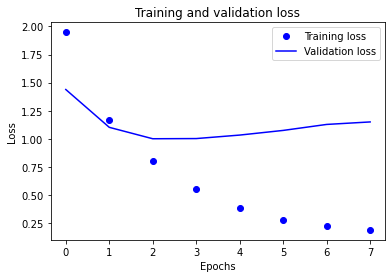

In [223]:
# make graph from history data - matplotlib
# store values in keys of dict

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = history.epoch # above

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


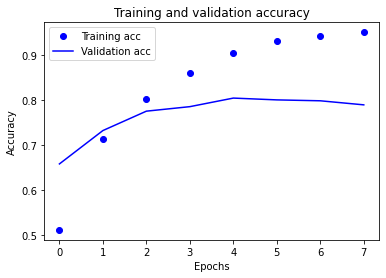

In [224]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [225]:
# What worked well
# 128 embedding, 10 epochs , 16 batch, 64 dense
# 512 embedding, dropout 0.5, dense 512, dense 46, 10 epochs, 16 batch
# 512 bedding, glob, dense 512, dense 46, 16 batch, 10 epoch

In [263]:
predict = reuters_mod.predict(test_reut)
type(predict), predict.shape 

(numpy.ndarray, (2246, 46))

In [264]:
type(reut_test_lab), reut_test_lab.shape 

(numpy.ndarray, (2246,))

In [266]:
predict

array([[2.2991246e-06, 7.3465388e-05, 1.4966441e-08, ..., 2.5877153e-08,
        1.9419689e-08, 1.2053750e-08],
       [2.2421990e-04, 4.2635087e-02, 6.0210720e-04, ..., 2.5395133e-08,
        1.3753878e-07, 1.8507811e-07],
       [9.8970071e-05, 7.0436901e-01, 2.3642531e-02, ..., 7.0779976e-07,
        8.1609898e-08, 3.7378689e-07],
       ...,
       [6.8458154e-05, 2.6004289e-03, 8.3885288e-06, ..., 2.7497097e-06,
        3.9316710e-05, 8.3872001e-06],
       [3.8884031e-03, 2.5668027e-02, 4.8102108e-03, ..., 1.0889239e-03,
        5.2463287e-04, 1.7459734e-03],
       [8.2722390e-06, 7.3090702e-01, 1.9114511e-03, ..., 6.4422416e-08,
        5.8670704e-08, 1.7662882e-07]], dtype=float32)

In [276]:
max(errors)

44.21925973892212

In [257]:
np.argmax(errors)

947

In [247]:
np.argmax(predict[0])

3

In [304]:
correct = []

for i in range(len(predict)):
    if np.argmax(predict[i]) == reut_test_lab[i]:
        correct.append(1)
    else:
        correct.append(0)

In [306]:
correct.count(1)

1723

In [307]:
correct.count(0)

523

In [309]:
1723/2246  # matches evaluation

0.7671415850400712

In [258]:
decode_newswire(test_reut[947]), reut_test_lab[947], reuter_topics[np.argmax(predict[947])]

(" denshin denwa co ltd which <UNK> the sector britain's cable and wireless plc lt cawl l which holds a 20 pct share in idc has opposed plans to merge with rival group lt international telecom japan inc under the plan backed by the post and telecommunications ministry cable and wireless and u s based lt pacific telesis international inc would become core companies in the merged firm with shares equal to those of the six major japanese core companies and seats on the board of directors britain angry over what it feels are moves to restrict cable and <UNK> role in the sector views the issue as a test case the idc official declined to specify what was holding up the talks a spokesman for c itoh and co ltd lt <UNK> t which holds 20 pct of idc said a meeting may be held later this week reuter 3",
 4,
 'wpi')

In [288]:
np.argmax(predict[1])

10

In [291]:
decode_newswire(test_reut[1]), reut_test_lab[1], reuter_topics[np.argmax(predict[1])]

(" were holding up despite <UNK> from artificial sweeteners and high fructose corn syrup but we are not happy with the reagan administration he said since <UNK> we have been regular suppliers of sugar to the u s in 1982 when they restored the quota system they cut <UNK> in half without any justification manila was <UNK> watching washington's moves to cut domestic support prices to 12 cents a pound from 18 cents the u s agriculture department last december slashed its 12 month 1987 sugar import quota from the philippines to 143 780 short tons from 231 660 short tons in 1986 yulo said despite next year's increased production target some philippine mills were expected to shut down at least four of the 41 mills were not working during the 1986 87 season he said we expect two or three more to follow suit during the next season reuter 3",
 10,
 'sugar')

In [227]:
np.argmax(predict[5])

3

In [229]:
decode_newswire(test_reut[200]), reut_test_lab[200], reuter_topics[np.argmax(predict[200])]

(' 2 300 metres within the <UNK> formation he said he said preliminary tests showed that the well could flow oil at the rate of 1 320 barrels a day with 50 degrees api at 20 degrees centigrade through a 5 8 inch choke the well also flows natural gas at the rate of 12 mln standard cubic feet a day he added <UNK> <UNK> 1 well located at a water depth of 41 metres was drilled under a production sharing contract between pertamina and <UNK> north sumatra ltd each having 50 pct shares petroleum operations are to be carried out by pertamina as operator through a joint operating body established by the two companies the pertamina spokesman stated the contract covers the <UNK> block contract area the two companies have previously completed the drilling of <UNK> <UNK> 1 exploratory well around 14 kms south of <UNK> <UNK> 1 reuter 3',
 16,
 'crude')

In [231]:
2246 * 0.767

1722.682

In [294]:
sortedindices = np.argsort(predict)
sortedindices

array([[26,  5, 37, ..., 20,  4,  3],
       [17, 33, 39, ...,  5,  1, 10],
       [44, 42, 45, ..., 16, 13,  1],
       ...,
       [26, 35, 33, ...,  1,  4,  3],
       [40, 17, 26, ..., 10,  4,  3],
       [17, 25, 33, ..., 22, 24,  1]])

In [301]:
sortedindices = range(len(predict))# not just argmax of errors, now have the array of indices where 1 is one with min error and max is max error, everything sorted in between
from ipywidgets import interact

@interact(n=(0,len(predict)-1))
def myf(n):
    i = sortedindices[n]
    print(f"index: {i}; test_label {reut_test_lab[i], reuter_topics[reut_test_lab[i]]}; Prediction: {np.argmax(predict[i]), reuter_topics[np.argmax(predict[i])]}")
    print()
    print(decode_newswire(test_reut[i]))
    

interactive(children=(IntSlider(value=1122, description='n', max=2245), Output()), _dom_classes=('widget-inter…